In [1]:
# First Check how others did theirs

# dictionary for classes
# get_face with mediapipe

# chech data distribution
# balance or weighr classes
# use efficient net
# make own model
# img size 48 is okay

In [1]:
import tensorflow as tf
import os
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import cv2 as cv

In [2]:
train_path = "C:/Users/Timii/Documents/Dev/Zummit/fer_data/train"
test_path = "C:/Users/Timii/Documents/Dev/Zummit/fer_data/test"

emotions = os.listdir(train_path)

len_train = {}
len_test = {}

for emotion in emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test)

print("Train: ", len_train)
print("Public Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Public Test: ", total_test)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Timii/Documents/Dev/Zummit/fer_data/train'

In [4]:
class_names = dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [5]:

def get_dataset_partitions_tf(ds, train_split=0.85, val_split=0.1, test_split=0.05, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    ds_size = len(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [6]:
train_dataset, val_dataset, test_dataset =get_dataset_partitions_tf(dataset)

In [7]:
len(train_dataset), len(val_dataset), len(test_dataset)

(175, 21, 23)

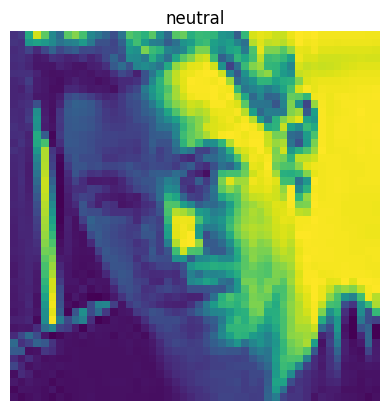

In [8]:
idx=1
for img, label in train_dataset.take(1):
    plt.imshow(img[idx].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(label[idx])])
    plt.axis("off")
    break

In [9]:
img[idx].shape

TensorShape([48, 48, 1])

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(10000).prefetch(buffer_size=AUTOTUNE)
val_ataset = val_dataset.cache().shuffle(10000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(10000).prefetch(buffer_size=AUTOTUNE)

In [18]:
data_augmenter = tf.keras.Sequential([
  Rescaling(1./255),
 RandomFlip('horizontal'),
 RandomRotation(0.1),
   RandomZoom(0.2, 0.2)
])

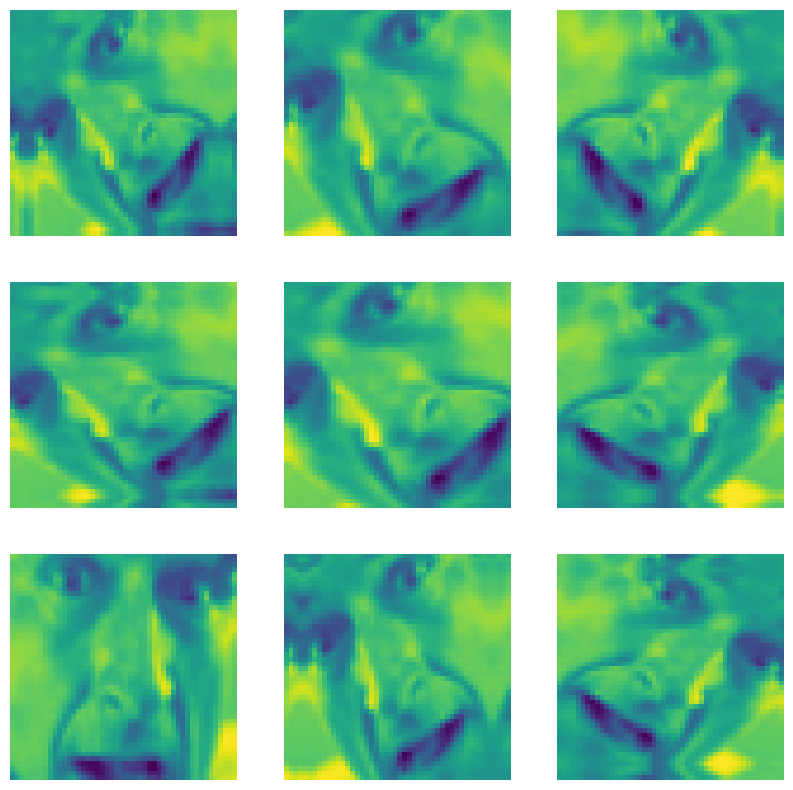

In [19]:
idx=2
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmenter(tf.expand_dims(img[idx], 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [27]:
inputs = tf.keras.Input(shape=(IMG_SIZE+(1,)))
x = get_face(inputs)
x = Conv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2,2), strides=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Conv2D(128, (3,3))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (3,3))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2,2), strides=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Conv2D(128, (3,3))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (3,3))(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D((2,2), strides=(2,2))(x)
x = Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
epochs = 5

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 48, 48, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 128)       0         
                                                           

In [28]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/5
175/175 [==============================] - 470s 3s/step - loss: 1.9947 - accuracy: 0.1597 - val_loss: 1.9461 - val_accuracy: 0.1250
Epoch 2/5
175/175 [==============================] - 480s 3s/step - loss: 1.9300 - accuracy: 0.1812 - val_loss: 1.9446 - val_accuracy: 0.1205
Epoch 3/5
175/175 [==============================] - 430s 2s/step - loss: 1.9215 - accuracy: 0.1878 - val_loss: 1.9306 - val_accuracy: 0.1994
Epoch 4/5
 62/175 [=========>....................] - ETA: 7:49 - loss: 1.9249 - accuracy: 0.1910

KeyboardInterrupt: 